## 과제: MNIST 데이터셋 학습을 위해 TensorFlow 또는 PyTorch 중 하나를 사용하여 자신만의 Neural Network (MLP 또는 CNN)을 설계하고 학습한 뒤 성능을 평가해보시기바랍니다. 보고서는 모델 디자인, 학습 로그, 성능 결과 및 그래프 등을 포함하여 자유 양식으로 작성 후 제출해주세요.
## Assignment: Design and train your own Neural Network (MLP or CNN) for the MNIST dataset and evaluate its performance using either TensorFlow or PyTorch. Your report should include the model design, training logs, performance results, and graphs in any format you prefer. You can submit your report in any format.



---


## 😎 아래 예제 코드를 수정하셔서 사용하셔도 좋고 자신만의 새로운 모델 MLP, CNN이 아닌 다른 모델을 사용하셔도 좋습니다. 
## You can modify the following example code or use your own model (not limited to MLP or CNN) for training.



---



# Importing the libraries/packages

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers, optimizers
import matplotlib.pyplot as plt

# Set random seed for reproducibility
tf.random.set_seed(0)

# Set the parameters for training
batchsize = 256
epochs = 10
lr = 0.001

In [2]:
def make_plots(history):
    plt.figure(figsize=(12,3))
    plt.subplot(1,2,1)
    plt.plot(history['loss'], label='Train')
    plt.plot(history['val_loss'], label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(history['accuracy'], label='Train')
    plt.plot(history['val_accuracy'], label='Validation')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    plt.show()

# Tensorflow (Keras)

In [3]:
# Load the MNIST dataset for TensorFlow
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Normalize the images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Convert the labels to one-hot encoded vectors
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Split the training set into training and validation sets
train_images, valid_images = train_images[:50000], train_images[50000:]
train_labels, valid_labels = train_labels[:50000], train_labels[50000:]

## MLP

Epoch 1/10
196/196 [==============================] - 1s 3ms/step - loss: 0.3655 - accuracy: 0.8965 - val_loss: 0.1613 - val_accuracy: 0.9565
Epoch 2/10
196/196 [==============================] - 1s 3ms/step - loss: 0.1462 - accuracy: 0.9574 - val_loss: 0.1260 - val_accuracy: 0.9661
Epoch 3/10
196/196 [==============================] - 1s 3ms/step - loss: 0.0977 - accuracy: 0.9713 - val_loss: 0.1205 - val_accuracy: 0.9665
Epoch 4/10
196/196 [==============================] - 1s 3ms/step - loss: 0.0732 - accuracy: 0.9782 - val_loss: 0.0922 - val_accuracy: 0.9732
Epoch 5/10
196/196 [==============================] - 1s 3ms/step - loss: 0.0552 - accuracy: 0.9840 - val_loss: 0.0891 - val_accuracy: 0.9739
Epoch 6/10
196/196 [==============================] - 1s 3ms/step - loss: 0.0407 - accuracy: 0.9880 - val_loss: 0.0786 - val_accuracy: 0.9776
Epoch 7/10
196/196 [==============================] - 1s 3ms/step - loss: 0.0331 - accuracy: 0.9901 - val_loss: 0.0796 - val_accuracy: 0.9770
Epoch 

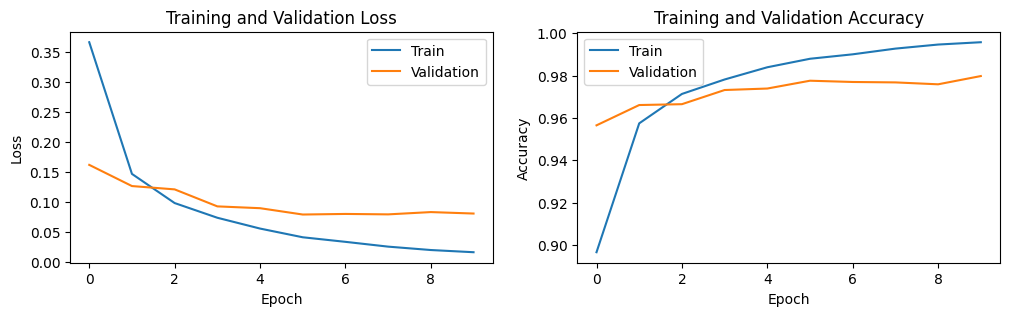

In [7]:
# Define the model architecture for TensorFlow
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the TensorFlow model for a specified number of epochs
model_history = model.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), epochs=epochs, batch_size=batchsize)

# Evaluate the TensorFlow model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(f'Test Accuracy : {test_acc*100:.2f}%')
make_plots(model_history.history)

## CNN

In [5]:
# Define the model architecture for TensorFlow
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2), strides=(2, 2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2), strides=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the TensorFlow model for a specified number of epochs
model_history = model.fit(train_images, train_labels, validation_data=(valid_images, valid_labels), epochs=epochs, batch_size=batchsize)

# Evaluate the TensorFlow model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=0)
print(f'Test Accuracy : {test_acc*100:.2f}%')
make_plots(model_history.history)

NameError: name 'Dropout' is not defined